Este trabalho tem objetivo da predição de séries temporais através do modelo SARIMAX utilizando a linguagem Python. Foram utilizados dados reais dos preços unitários de 55 produtos durante todos dias do ano de 2019 de uma loja específica dos EUA. Os dados contam ainda com outras variáveis, como custo unitário, preço médio dos concorrentes, situação do mercado e etc. O objetivo principal é prever o preço que essa loja utilizará no dia posterior com base no comportamento no tempo das variáveis propostas.

### 1. Instalar Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from datetime import date

from statsmodels.tsa.arima.model import ARIMA


In [2]:
!pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
from pmdarima.arima import auto_arima

### 2. Importar os dados

In [6]:
from google.colab import files
uploaded = files.upload()

Saving output_data.csv to output_data (2).csv


In [7]:
df = pd.read_csv('output_data.csv', sep = ',', index_col = "output_date", parse_dates = True )
# importante definir a coluna data como index

• “Mkt_id” - identificador do produto

• “Output_date” - identificador da data (dia)

• “Output_own_price” - preço unitário da loja específica (por dia)

• “Output_own_cost” - custo unitário do produto da loja específica (por dia)

• “Output_comp_price” - média do preço dos competidores

• “Output_X” - variável que resume situação do mercado (0- 100)

• “Output_own_sales” - vendas da loja no dia

• “Output_own_share” - participação da loja na venda total do mercado (%)

• “Output_own_profits” - lucro da loja no dia


In [8]:
df = df.sort_values(by ="output_date", ascending = True) # coloque a data em ordem crescente
df.head(50)

,mkt_id,output_own_price,output_own_cost,output_comp_price,output_own_profits,output_X,output_own_share,output_own_sales
output_date,,,,,,,,
2019-01-01,44,7.05,5.90,7.11,15.065000,42.80,0.515267,13.10
2019-01-01,5029,7.29,6.08,7.22,20.908800,40.10,0.510447,17.28
2019-01-01,4911,7.25,6.03,7.22,21.618390,39.92,0.490370,17.72
2019-01-01,4896,7.25,6.05,7.19,19.896000,40.64,0.481579,16.58
2019-01-01,4887,7.15,5.96,7.31,19.313700,36.32,0.437932,16.23
2019-01-01,3875,7.29,6.06,7.22,22.902600,38.48,0.512944,18.62
2019-01-01,2812,7.22,6.09,7.09,13.130600,42.26,0.389439,11.62
2019-01-01,13777,7.08,5.92,7.23,16.066000,42.98,0.494019,13.85
2019-01-01,2704,7.15,6.03,7.18,12.712000,42.98,0.455262,11.35


### 3. Escolher o produto

Vamos listar todos os códigos dos produtos que temos:

Para melhor performance do modelo, vamos considerar que o comportamento entre os produtos sejam independentes. Vamos definir qual produto utilizar e realizar o processamento individualmente.

In [9]:
df['mkt_id'].unique()

array([   44,  5029,  4911,  4896,  4887,  3875,  2812, 13777,  2704,
        2700,  2485,  2306,  2290, 15000,  2261,  2252,   603,   183,
         167,   164, 15555,   154,   150,   131, 13674,    91,  5099,
        5109,  7394,  7393,  7389,  7374,  7370,  7369,  7403,  7341,
        7331,  7330,  7329,  7319,  7187,  7412,  7106,  7075,  5404,
        5397,  5371,  7432,  5349,  5279,  5142,  5100,    78,  7396])

In [10]:
def escolher_produto(df, id):
  data = df.loc[df['mkt_id']== id,:]
  return data

Neste exemplo, vamos usar o produto 44 para predição. Mas qualquer outro poder´ser utilizado, bastando fazer a escolha no argumento da função.

In [11]:
df = escolher_produto(df, 5029)
df.head()

,mkt_id,output_own_price,output_own_cost,output_comp_price,output_own_profits,output_X,output_own_share,output_own_sales
output_date,,,,,,,,
2019-01-01,5029,7.29,6.08,7.22,20.90880,40.10,0.510447,17.28
2019-01-02,5029,7.29,6.05,7.22,30.65279,35.06,0.564283,24.72
2019-01-03,5029,7.29,5.96,7.21,33.14360,32.90,0.557695,24.92
2019-01-04,5029,7.29,5.95,7.21,34.50500,33.26,0.524654,25.75
2019-01-05,5029,6.72,5.97,6.77,3.62250,35.42,0.529843,4.83


In [12]:
# vamos converter os mkt_id para string
df["mkt_id"] = df["mkt_id"].astype(str)

<ipython-input-12-b0475b4e5e59>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["mkt_id"] = df["mkt_id"].astype(str)


In [13]:
df.describe()

,output_own_price,output_own_cost,output_comp_price,output_own_profits,output_X,output_own_share,output_own_sales
count,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000,365.000000
mean,7.008493,6.005260,7.001699,8.125893,53.311507,0.504186,6.998575
std,0.200098,0.051901,0.196716,9.567309,15.378094,0.077376,7.539653
min,6.580000,5.840000,6.610000,0.021300,28.220000,0.285878,0.030000
25%,6.800000,5.970000,6.790000,0.893000,40.460000,0.452016,1.010000
50%,7.050000,6.010000,7.050000,3.605901,50.900000,0.508688,3.590000
75%,7.160000,6.040000,7.140000,13.564800,64.760000,0.555028,11.570000
max,7.350000,6.130000,7.360000,40.147180,91.940000,0.722094,32.640000


In [14]:
df.index.min(), df.index.max()

(Timestamp('2019-01-01 00:00:00'), Timestamp('2019-12-31 00:00:00'))

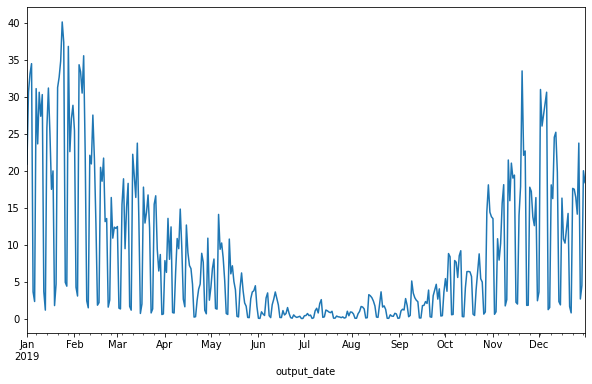

In [15]:
df['output_own_profits'].plot(figsize=(10,6))

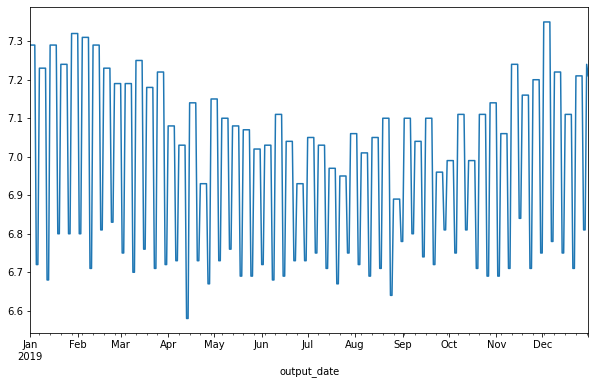

In [16]:
df['output_own_price'].plot(figsize=(10,6))

Podemos observar que os finais de semana tem em geral um preço menor que os dias úteis. Uma nova coluna indicando se a data édia útil ou não faria sentido.

In [17]:
#df['is_weekday'] = df['output_date'].weekday()
#df['is_weekday'] = df.index
#df['is_weekday']= pd.DataFrame(df['is_weekday'])
#df['is_weekday'] = pd.to_datetime(df['is_weekday'], format="%a %b %d %X %Z %Y").map(lambda x: x.weekday())
#df['is_weekday'] =df['is_weekday'].apply(lambda x:0 if x>4 else 1)
#df.head(15)

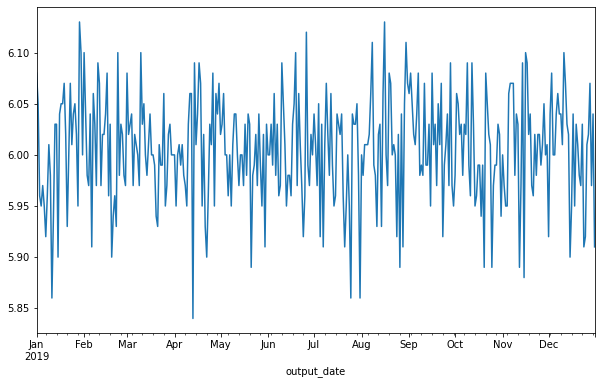

In [18]:
df['output_own_cost'].plot(figsize=(10,6))

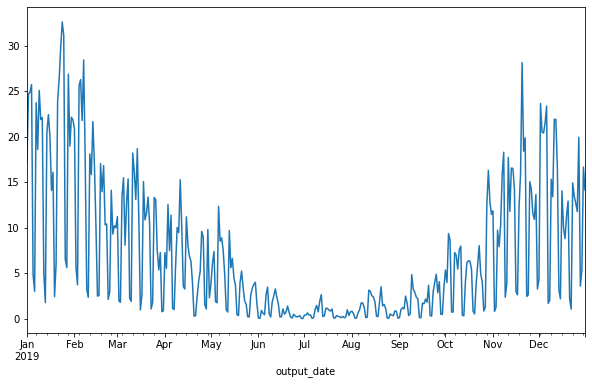

In [19]:
df['output_own_sales'].plot(figsize=(10,6))

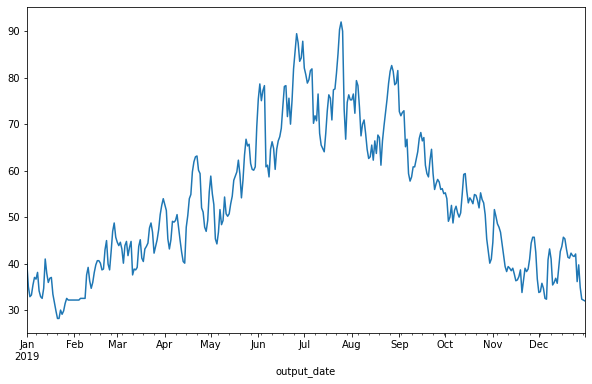

In [20]:
df['output_X'].plot(figsize=(10,6))

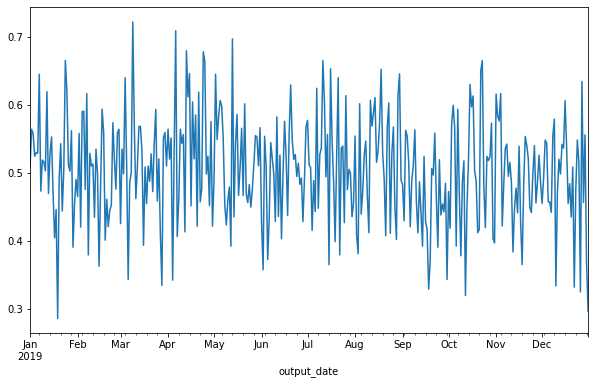

In [21]:
df['output_own_share'].plot(figsize=(10,6))


In [22]:
# remover coluna "mkt_id"

dfEnc = df.drop('mkt_id', axis= 1)

### 4. Analisar correlação

In [23]:
dfEnc.corr()

,output_own_price,output_own_cost,output_comp_price,output_own_profits,output_X,output_own_share,output_own_sales
output_own_price,1.000000,0.089358,0.935043,0.753013,-0.348710,-0.081008,0.740707
output_own_cost,0.089358,1.000000,0.022990,-0.011285,-0.028657,-0.064780,0.024927
output_comp_price,0.935043,0.022990,1.000000,0.728180,-0.336066,-0.020975,0.725834
output_own_profits,0.753013,-0.011285,0.728180,1.000000,-0.692326,0.066897,0.994582
output_X,-0.348710,-0.028657,-0.336066,-0.692326,1.000000,0.022458,-0.721603
output_own_share,-0.081008,-0.064780,-0.020975,0.066897,0.022458,1.000000,0.081046
output_own_sales,0.740707,0.024927,0.725834,0.994582,-0.721603,0.081046,1.000000


A coluna de 'profit' está muito relacionada com o número de vendas e por isso pode ser excluída.

In [24]:
# dropando variável profit
dfDrop = dfEnc.drop('output_own_profits', axis= 1)

### 5. Definir Target

Vamos criar uma série para a variável target. Como a previsão do price de amanhã será baseada no price de hoje, precisamos reestruturar os dados adicionando a coluna "actual_price", que será justamente o preço do produto do próximo dia. Para isso utilizaremos a função 'shift.steps". Caso a previsão seja para dois dias posteriores o steps= -2.

In [25]:
# criando a variável actual_price através da função step

steps=-1
dataset_for_prediction= dfDrop.copy()
dataset_for_prediction["actual_price"]=dataset_for_prediction["output_own_price"].shift(steps)
dataset_for_prediction.head(3)

,output_own_price,output_own_cost,output_comp_price,output_X,output_own_share,output_own_sales,actual_price
output_date,,,,,,,
2019-01-01,7.29,6.08,7.22,40.10,0.510447,17.28,7.29
2019-01-02,7.29,6.05,7.22,35.06,0.564283,24.72,7.29
2019-01-03,7.29,5.96,7.21,32.90,0.557695,24.92,7.29


Essa função acaba por gerar uma linha com valores nulos, logo podemos dropá-la

In [26]:
dataset_for_prediction=dataset_for_prediction.dropna()

### 6. Normalizar dados

As variáveis possuem algumas escalas diferentes, por isso precisamos padronizá-los. Usando o MinMaxScaler, os dados estarão escalados em um intervalo fixo entre 0 e 1.

In [28]:
# aplicando a normalização na base e separando a base em X e Y

from sklearn.preprocessing import MinMaxScaler
sc_in = MinMaxScaler(feature_range=(0, 1))
scaled_input = sc_in.fit_transform(dataset_for_prediction[['output_own_price', 'output_own_cost',
       'output_comp_price', 'output_X', 'output_own_share', 'output_own_sales',]])
scaled_input =pd.DataFrame(scaled_input)
X= scaled_input

In [29]:
sc_out = MinMaxScaler(feature_range=(0, 1))
scaler_output = sc_out.fit_transform(dataset_for_prediction[["actual_price"]])
scaler_output =pd.DataFrame(scaler_output)
y=scaler_output

In [30]:
X.rename(columns={0:'output_own_price',1: 'output_own_cost',2:
       'output_comp_price', 3:'output_X', 4:'output_own_share', 5:'output_own_sales'}, inplace=True)
X.index=dataset_for_prediction.index
X.head(2)

,output_own_price,output_own_cost,output_comp_price,output_X,output_own_share,output_own_sales
output_date,,,,,,
2019-01-01,0.922078,0.827586,0.813333,0.186441,0.514810,0.528979
2019-01-02,0.922078,0.724138,0.813333,0.107345,0.638227,0.757130


In [31]:
y.rename(columns={0:"price_next_day"}, inplace= True)
y.index=dataset_for_prediction.index
y.head(2)

,price_next_day
output_date,
2019-01-01,0.922078
2019-01-02,0.922078


### 7. Dividir dados em treino e teste

Ajustaremos 70% dos dados para treino e 30% para teste.

In [32]:
# dividir base em treino e teste

train_size=int(len(df) *0.7)
test_size = int(len(df)) - train_size
train_X, train_y = X[:train_size].dropna(), y[:train_size].dropna()
test_X, test_y = X[train_size:].dropna(), y[train_size:].dropna()

### 8. Explorar a série temporal

Vamos decompor a série temporal para analisar tendência, sazonalidade e ruído. Usaremos a peridiocidade de 365

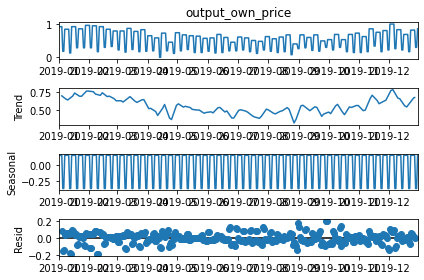

In [33]:
# entendendo as séries temporais

import statsmodels.api as sm
seas_d=sm.tsa.seasonal_decompose(X["output_own_price"],model="add",period=7);
fig=seas_d.plot()
fig.set_figheight(4)
plt.show()

### 9. Testar Estacionaridade

Se os dados são estacionários, isso significa que poderemos fazer previsões com base no fato de que a média e a variância permenecerão as mesmas no futuro. Uma série estacionário não apresenta tendência de mudança, sendo mais faácil de se prever.

Para verificar isso, usaremos o teste "Augmented Dickey-Fuller ", um popular método estatístico para descobrir se a série é estacionário ou não.

In [34]:
# Cria uma função para classificar se devemos aceitar o rejeitar a hipótese nula

from statsmodels.tsa.stattools import adfuller
def test_adf(series, title=''):
    dfout={}
    dftest=sm.tsa.adfuller(series.dropna(), autolag='AIC', regression='ct')
    for key,val in dftest[4].items():
        dfout[f'critical value ({key})']=val
    if dftest[1]<=0.05:
        print("Forte evidência contra a hipótese nula")
        print("Rejeite a hipótese nula - Estacionária")
        print("Dados são estacionários", title)
    else:
        print("Forte evidência para a hipótese nula")
        print("Aceite a hipótese nula - Estacionária")
        print("Dados não são estacionários", title)

In [35]:
y_test=y["price_next_day"][:train_size].dropna()
test_adf(y_test, " Price")

Forte evidência para a hipótese nula
Aceite a hipótese nula - Estacionária
Dados não são estacionários  Price


Aplicando a função diff() podemos tornar os dados estacionários

In [36]:
test_adf(y_test.diff(), "Price")

Forte evidência contra a hipótese nula
Rejeite a hipótese nula - Estacionária
Dados são estacionários Price


### 10. Construir Modelo

Para a construção do modelo precisamos definir os parâmetros necessários.
Uma forma de analisar isso é através da autocorrelação.


Gráfico Autocorrelation: é um gráfico de barras dos coeficientes de correlação entre uma série temporal e suas defasagens. Isso ajuda a determinar o valor de p ou o termo AR.

Gráfico Partial Autocorrelation: um gráfico dos coeficientes de correlação parcial entre a série e as defasagens dela mesma. Ajuda a determinar o valor de q ou o termo MA

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


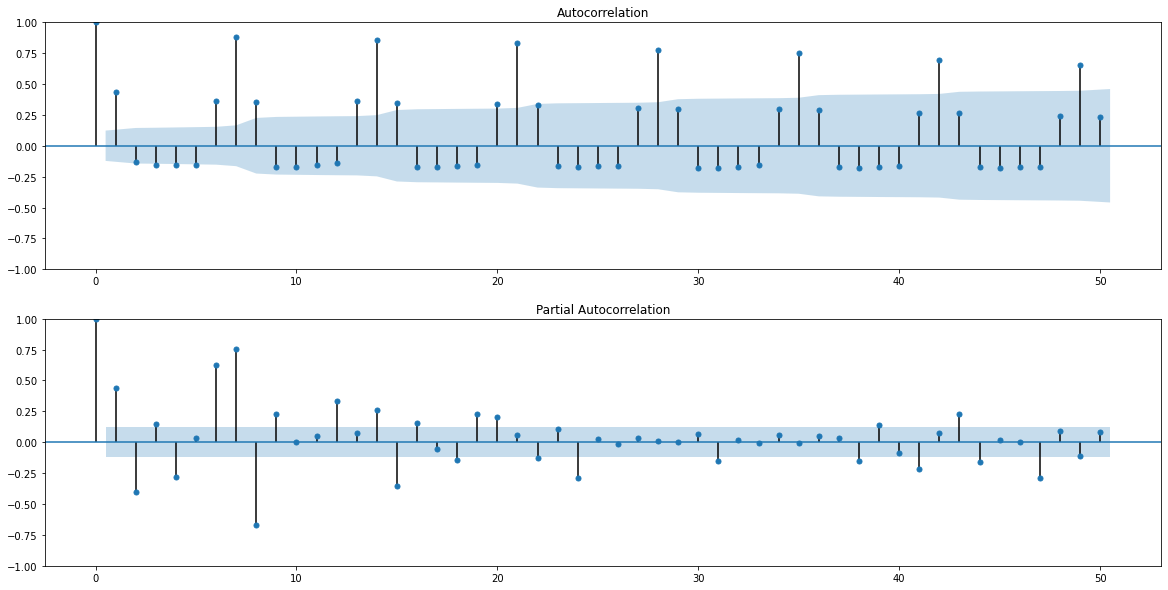

In [37]:
# autocorrelação

fig,ax= plt.subplots(2,1, figsize=(20,10))
fig=sm.tsa.graphics.plot_acf(y_test, lags=50, ax=ax[0])
fig=sm.tsa.graphics.plot_pacf(y_test, lags=50, ax=ax[1])
plt.show()

Vemos que o primeiro gráfico apresenta uma sazonalidade bem definida dentro dos dados.

Um jeito mais fácil de se definir os parâmetros do modelo é através da função auto_arima. 

A função auto_arima ajusta o melhor modelo ARIMA aos dados da série temporal. Isso é feito com base nos parâmetros que você fornece com base no critério de informações como AIC. A função executa uma pesquisa passo a passo sobre possíveis modelos e pedidos sazonais dentro das restrições fornecidas. Ele seleciona os parâmetros que minimizam a métrica fornecida, como AIC (Akaike Information Criterion).

In [38]:
from pmdarima.arima import auto_arima
step_wise=auto_arima(train_y, 
 exogenous= train_X,
 start_p=1, start_q=1, 
 max_p=7, max_q=7, 
 d=1, max_d=7, m =12,
 trace=True, 
 error_action="ignore", 
 suppress_warnings=True, 
 stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=-102.593, Time=2.08 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=72.623, Time=0.07 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=14.356, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=-41.911, Time=0.47 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=70.629, Time=0.05 sec
 ARIMA(1,1,1)(0,0,1)[12] intercept   : AIC=-104.571, Time=1.22 sec
 ARIMA(1,1,1)(0,0,0)[12] intercept   : AIC=76.623, Time=0.08 sec
 ARIMA(1,1,1)(0,0,2)[12] intercept   : AIC=-102.079, Time=3.44 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=16.356, Time=0.37 sec
 ARIMA(1,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=3.35 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=-37.901, Time=0.36 sec
 ARIMA(2,1,1)(0,0,1)[12] intercept   : AIC=-120.444, Time=1.69 sec
 ARIMA(2,1,1)(0,0,0)[12] intercept   : AIC=10.617, Time=0.16 sec
 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=2.14 sec
 ARIMA(2,1,1)(0,0,2)[12] intercept   : AIC=

In [39]:
step_wise.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  255
Model:             SARIMAX(7, 1, 1)x(0, 0, 1, 12)   Log Likelihood                 303.453
Date:                            Tue, 24 Jan 2023   AIC                           -586.905
Time:                                    11:59:54   BIC                           -551.532
Sample:                                01-01-2019   HQIC                          -572.675
                                     - 09-12-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2470      0.090     -2.736      0.006      -0.424      -0.070
ar.L2         -0.2786      0.063     -4.419      0.000      -0.402      -0.155
ar.L3         -0.2666      0.081     -3.285      0.001      -0.426      -0.108
ar.L4         -0.2486      0.074     -3.375      0.001      -0.393      -0.104
ar.L5         -0.2975      0.063     -4.692      0.000      -0.422      -0.173
ar.L6         -0.2371      0.087     -2.711      0.007      -0.408      -0.066
ar.L7          0.6835      0.060     11.422      0.000       0.566       0.801
ma.L1          0.1068      0.204      0.522      0.602      -0.294       0.508
ma.S.L12       0.2699      0.069      3.940      0.000       0.136       0.404
sigma2         0.0050      0.000     15.904      0.000       0.004       0.006
===================================================================================
Ljung-Box (L1) (Q):                   0.05   Jarque-Bera (JB):               757.93
Prob(Q):                              0.83   Prob(JB):                         0.00
Heteroskedasticity (H):               1.66   Skew:                             0.39
Prob(H) (two-sided):                  0.02   Kurtosis:                        11.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
step_wise

ARIMA(order=(7, 1, 1), scoring_args={}, seasonal_order=(0, 0, 1, 12),
      suppress_warnings=True, with_intercept=False)

In [41]:
train_X = np.array(train_X)
train_y = np.array(train_y)

In [42]:
# treinando o modelo com base nos parâmetros fornecidos pelo auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
model= SARIMAX(train_y, 
 exog=train_X,
 order=step_wise.order, seasonal_order= step_wise.seasonal_order,
 enforce_invertibility=False, enforce_stationarity=False)

In [43]:
results= model.fit()

/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### 11. Gerar predição

Para prever, podemos utilizar os métodos predict () ou forecast().

Abaixo, usamos predict() e fornecemos o início e o fim, junto com a variável exog com base na qual as previsões serão feitas.

In [44]:
predictions= results.predict(start =train_size, end=train_size+test_size+(steps)-1,exog=test_X)

Também podemos usar o forecast() e fornecer os parâmetros step e exog. steps é um valor inteiro que especifica o número de preíodos a serem previstas a partir do final da amostra.

In [45]:
forecast_1= results.forecast(steps=test_size-1, exog=test_X)

### 12. Plotar resultados

Criamos um DataFrame para guardar os preços já registrados da base de treino da variável target

In [46]:
act= pd.DataFrame(scaler_output.iloc[train_size:, 0])

Criamos outro DataFrame para guardar o data, o preço atual e preço previsto

In [47]:
predictions=pd.DataFrame(predictions)
predictions.reset_index(drop=True, inplace=True)
predictions.index=test_X.index
predictions['actual_price'] = act['price_next_day']
predictions.rename(columns={0:'Pred'}, inplace=True)

Plotamos em um gráfico para comparação.

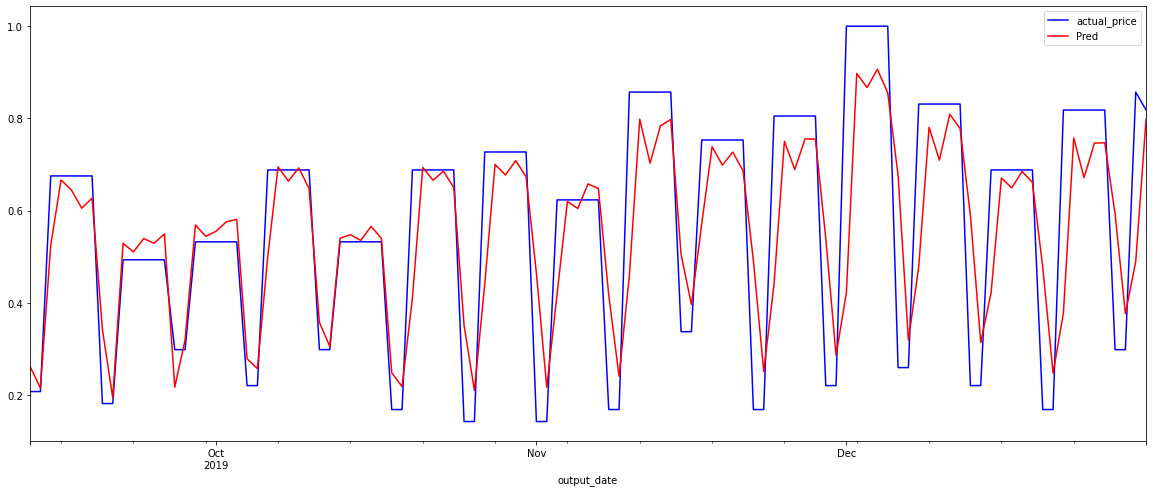

In [48]:
predictions["actual_price"].plot(figsize=(20,8), legend=True, color="blue")
predictions["Pred"].plot(legend=True, color="red", figsize=(20,8))

In [49]:
actual= pd.DataFrame(scaler_output.iloc[train_size:, 0])
actual.index=test_X.index
actual.head()

,price_next_day
output_date,
2019-09-13,0.207792
2019-09-14,0.207792
2019-09-15,0.675325
2019-09-16,0.675325
2019-09-17,0.675325


Fazemos o mesmo para o Forecast

In [50]:

forecast_apple= pd.DataFrame(forecast_1)
forecast_apple.reset_index(drop=True, inplace=True)
forecast_apple.index=test_X.index
forecast_apple["actual_price"] = actual['price_next_day']
forecast_apple.rename(columns={0:"Forecast"}, inplace=True)

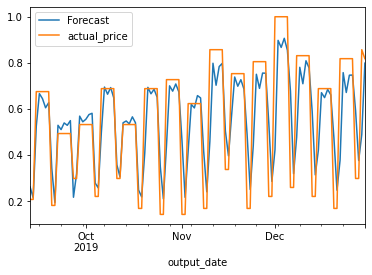

In [51]:
forecast_apple["Forecast"].plot(legend=True)
forecast_apple["actual_price"].plot(legend=True)

### 12. Avaliar modelo

Para avaliar o modelo, utilizaremos o RMSE que possui como resultado um valor na mesma dimensão da nossa variável target.

In [52]:
from statsmodels.tools.eval_measures import rmse
error=rmse(predictions["Pred"], predictions["actual_price"])
error

0.1574213715889003

Utilizamos a função abaixo para reverter a escala dos números e obtermos os resultados

In [53]:
trainPredict = sc_out.inverse_transform(predictions[["Pred"]])
testPredict = sc_out.inverse_transform(predictions[["actual_price"]])

In [54]:
testPredict

array([[6.74],
       [6.74],
       [7.1 ],
       [7.1 ],
       [7.1 ],
       [7.1 ],
       [7.1 ],
       [6.72],
       [6.72],
       [6.96],
       [6.96],
       [6.96],
       [6.96],
       [6.96],
       [6.81],
       [6.81],
       [6.99],
       [6.99],
       [6.99],
       [6.99],
       [6.99],
       [6.75],
       [6.75],
       [7.11],
       [7.11],
       [7.11],
       [7.11],
       [7.11],
       [6.81],
       [6.81],
       [6.99],
       [6.99],
       [6.99],
       [6.99],
       [6.99],
       [6.71],
       [6.71],
       [7.11],
       [7.11],
       [7.11],
       [7.11],
       [7.11],
       [6.69],
       [6.69],
       [7.14],
       [7.14],
       [7.14],
       [7.14],
       [7.14],
       [6.69],
       [6.69],
       [7.06],
       [7.06],
       [7.06],
       [7.06],
       [7.06],
       [6.71],
       [6.71],
       [7.24],
       [7.24],
       [7.24],
       [7.24],
       [7.24],
       [6.84],
       [6.84],
       [7.16],
       [7.

In [55]:
trainPredict

array([[6.78173273],
       [6.74609477],
       [6.98436691],
       [7.09327446],
       [7.07655208],
       [7.0460682 ],
       [7.06295223],
       [6.84364361],
       [6.7296111 ],
       [6.98755298],
       [6.97320914],
       [6.99539916],
       [6.9874988 ],
       [7.00316429],
       [6.74726486],
       [6.82624328],
       [7.01814209],
       [6.99913538],
       [7.0077321 ],
       [7.02334818],
       [7.0276077 ],
       [6.79468178],
       [6.77831307],
       [6.96507924],
       [7.11516948],
       [7.09129721],
       [7.113434  ],
       [7.07914999],
       [6.85554951],
       [6.81554472],
       [6.99596411],
       [7.00192744],
       [6.99235107],
       [7.01575491],
       [6.99581565],
       [6.77129479],
       [6.74841056],
       [6.89606382],
       [7.11420999],
       [7.09272887],
       [7.10786164],
       [7.08077273],
       [6.85045537],
       [6.74193763],
       [6.91930513],
       [7.11930312],
       [7.1015438 ],
       [7.125

A produtização do modelo deve ser feita para melhor visualização dos resultados de cada produto.